In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
from cfa import cfa_single_layer, performance_plot, RSC_graph, compute_cd_ds, compute_performance

In [3]:
from cfa import fusion_function

In [4]:
data = np.load("../diffqas_predictions_magic_gamma_20260212_050505.npz")
models = data.files[1:]
prob_df = pd.concat([pd.Series(data[m], name = m) for m in models], axis = 1)
prob_df.head(3)

,pred_H_RX_std_RX,pred_H_RX_std_RY,pred_H_RX_std_RZ,pred_H_RX_cyc_RX,pred_H_RX_cyc_RY,pred_H_RX_cyc_RZ,pred_H_RY_std_RX,pred_H_RY_std_RY,pred_H_RY_std_RZ,pred_H_RY_cyc_RX,...,pred_noH_RY_std_RZ,pred_noH_RY_cyc_RX,pred_noH_RY_cyc_RY,pred_noH_RY_cyc_RZ,pred_noH_RZ_std_RX,pred_noH_RZ_std_RY,pred_noH_RZ_std_RZ,pred_noH_RZ_cyc_RX,pred_noH_RZ_cyc_RY,pred_noH_RZ_cyc_RZ
0,0.325533,0.327261,0.325533,0.325533,0.325255,0.325533,0.014144,0.030560,0.017420,0.003784,...,0.091405,0.023912,0.146871,0.094899,0.319317,0.325685,0.355362,0.319314,0.319443,0.355362
1,0.325533,0.327261,0.325533,0.325533,0.325255,0.325533,0.002712,0.006150,0.001615,0.000361,...,0.002262,0.013351,0.004092,0.039913,0.319317,0.325685,0.355362,0.319314,0.319443,0.355362
2,0.325533,0.327261,0.325533,0.325533,0.325255,0.325533,0.324476,0.438159,0.501666,0.327218,...,0.162144,0.569039,0.252237,0.505952,0.319317,0.325685,0.355362,0.319314,0.319443,0.355362


In [5]:
y_true = data['y_true']
y_true

array([0, 0, 1, ..., 0, 1, 0])

In [6]:
# use previous style
import matplotlib.pyplot as plt
plt.style.use("../../QAIfusion/recovered_style.mplstyle")

In [7]:
prob_df_colUnique = prob_df.T.drop_duplicates().T
prob_df_colUnique.shape
# remove constant columns
prob_df_colUnique = prob_df_colUnique.loc[:, prob_df_colUnique.nunique() > 3]
prob_df_colUnique.shape

(3804, 20)

In [8]:
prob_df_colUnique

,pred_H_RY_std_RX,pred_H_RY_std_RY,pred_H_RY_std_RZ,pred_H_RY_cyc_RX,pred_H_RY_cyc_RY,pred_H_RY_cyc_RZ,pred_H_RZ_std_RX,pred_H_RZ_std_RY,pred_H_RZ_cyc_RX,pred_H_RZ_cyc_RY,pred_noH_RX_std_RX,pred_noH_RX_std_RY,pred_noH_RX_std_RZ,pred_noH_RX_cyc_RX,pred_noH_RX_cyc_RY,pred_noH_RX_cyc_RZ,pred_noH_RY_std_RX,pred_noH_RY_std_RY,pred_noH_RY_cyc_RX,pred_noH_RY_cyc_RY
0,0.014144,0.030560,0.017420,0.003784,0.079854,0.002811,0.113611,0.114510,0.131442,0.036310,0.105606,0.057832,0.091405,0.109314,0.043981,0.094899,0.095327,0.035484,0.023912,0.146871
1,0.002712,0.006150,0.001615,0.000361,0.013006,0.000250,0.005656,0.008104,0.006675,0.016945,0.004512,0.009429,0.002262,0.003722,0.016967,0.039913,0.003034,0.008561,0.013351,0.004092
2,0.324476,0.438159,0.501666,0.327218,0.179764,0.353897,0.169510,0.306143,0.074672,0.300520,0.290336,0.348492,0.162144,0.443734,0.340885,0.505952,0.142276,0.526712,0.569039,0.252237
3,0.040976,0.071221,0.048621,0.066415,0.090417,0.063866,0.149880,0.032579,0.150750,0.059407,0.076534,0.082956,0.057811,0.106681,0.083694,0.084651,0.061095,0.141687,0.042050,0.088999
4,0.107281,0.048785,0.076163,0.062938,0.059130,0.053975,0.020231,0.031072,0.020641,0.037231,0.063340,0.034266,0.020836,0.028756,0.031946,0.008663,0.018629,0.036497,0.032824,0.023975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,0.114219,0.137303,0.139288,0.249706,0.258709,0.240378,0.197077,0.165283,0.159331,0.178448,0.229749,0.260257,0.315696,0.233482,0.280734,0.215840,0.336282,0.157141,0.231758,0.241585
3800,0.810223,0.841710,0.840276,0.638629,0.684006,0.657548,0.728503,0.856817,0.356250,0.883368,0.701217,0.835879,0.735133,0.912322,0.890150,0.622616,0.744596,0.829657,0.521594,0.826300
3801,0.164394,0.076996,0.103281,0.126348,0.122903,0.126095,0.085048,0.045093,0.149114,0.037939,0.060200,0.071754,0.039671,0.062159,0.102399,0.049275,0.038963,0.050244,0.043171,0.063586
3802,0.309950,0.173566,0.271956,0.224553,0.496636,0.208609,0.292361,0.276125,0.353486,0.339710,0.196525,0.269945,0.290822,0.190448,0.083151,0.126190,0.317502,0.279208,0.157732,0.166698


In [16]:
df1 = prob_df_colUnique.iloc[:, 0:5]
df1

,pred_H_RY_std_RX,pred_H_RY_std_RY,pred_H_RY_std_RZ,pred_H_RY_cyc_RX,pred_H_RY_cyc_RY
0,0.014144,0.030560,0.017420,0.003784,0.079854
1,0.002712,0.006150,0.001615,0.000361,0.013006
2,0.324476,0.438159,0.501666,0.327218,0.179764
3,0.040976,0.071221,0.048621,0.066415,0.090417
4,0.107281,0.048785,0.076163,0.062938,0.059130
...,...,...,...,...,...
3799,0.114219,0.137303,0.139288,0.249706,0.258709
3800,0.810223,0.841710,0.840276,0.638629,0.684006
3801,0.164394,0.076996,0.103281,0.126348,0.122903
3802,0.309950,0.173566,0.271956,0.224553,0.496636


In [17]:
asc = fusion_function.average_rank_combination(df1)
asc

,pred_H_RY_std_RXpred_H_RY_std_RY,pred_H_RY_std_RXpred_H_RY_std_RZ,pred_H_RY_std_RXpred_H_RY_cyc_RX,pred_H_RY_std_RXpred_H_RY_cyc_RY,pred_H_RY_std_RYpred_H_RY_std_RZ,pred_H_RY_std_RYpred_H_RY_cyc_RX,pred_H_RY_std_RYpred_H_RY_cyc_RY,pred_H_RY_std_RZpred_H_RY_cyc_RX,pred_H_RY_std_RZpred_H_RY_cyc_RY,pred_H_RY_cyc_RXpred_H_RY_cyc_RY,...,pred_H_RY_std_RYpred_H_RY_std_RZpred_H_RY_cyc_RX,pred_H_RY_std_RYpred_H_RY_std_RZpred_H_RY_cyc_RY,pred_H_RY_std_RYpred_H_RY_cyc_RXpred_H_RY_cyc_RY,pred_H_RY_std_RZpred_H_RY_cyc_RXpred_H_RY_cyc_RY,pred_H_RY_std_RXpred_H_RY_std_RYpred_H_RY_std_RZpred_H_RY_cyc_RX,pred_H_RY_std_RXpred_H_RY_std_RYpred_H_RY_std_RZpred_H_RY_cyc_RY,pred_H_RY_std_RXpred_H_RY_std_RYpred_H_RY_cyc_RXpred_H_RY_cyc_RY,pred_H_RY_std_RXpred_H_RY_std_RZpred_H_RY_cyc_RXpred_H_RY_cyc_RY,pred_H_RY_std_RYpred_H_RY_std_RZpred_H_RY_cyc_RXpred_H_RY_cyc_RY,pred_H_RY_std_RXpred_H_RY_std_RYpred_H_RY_std_RZpred_H_RY_cyc_RXpred_H_RY_cyc_RY
0,3142.0,3294.0,3413.5,2909.0,3128.0,3247.5,2743.0,3399.5,2895.0,3014.5,...,3258.333333,2922.000000,3001.666667,3103.000000,3270.75,3018.50,3078.25,3154.25,3071.25,3118.6
1,3745.0,3737.5,3738.5,3563.5,3784.5,3785.5,3610.5,3778.0,3603.0,3604.0,...,3782.666667,3666.000000,3666.666667,3661.666667,3761.50,3674.00,3674.50,3670.75,3694.25,3695.0
2,1231.5,1192.0,1367.5,1588.0,1091.5,1267.0,1487.5,1227.5,1448.0,1623.5,...,1195.333333,1342.333333,1459.333333,1433.000000,1229.50,1339.75,1427.50,1407.75,1357.50,1352.4
3,2748.5,2943.0,2937.5,2717.5,2690.5,2685.0,2465.0,2879.5,2659.5,2654.0,...,2751.666667,2605.000000,2601.333333,2731.000000,2814.00,2704.00,2701.25,2798.50,2672.25,2738.0
4,2503.5,2439.0,2610.0,2503.5,2638.5,2809.5,2703.0,2745.0,2638.5,2809.5,...,2731.000000,2660.000000,2774.000000,2731.000000,2624.25,2571.00,2656.50,2624.25,2724.00,2640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,2125.5,2169.5,1929.0,1875.5,2040.0,1799.5,1746.0,1843.5,1790.0,1549.5,...,1894.333333,1858.666667,1698.333333,1727.666667,1984.50,1957.75,1837.50,1859.50,1794.75,1886.8
3800,705.5,696.0,836.5,791.0,687.5,828.0,782.5,818.5,773.0,913.5,...,778.000000,747.666667,841.333333,835.000000,762.00,739.25,809.50,804.75,800.50,783.2
3801,2195.5,2144.5,2155.5,2083.0,2398.0,2409.0,2336.5,2358.0,2285.5,2296.5,...,2388.333333,2340.000000,2347.333333,2313.333333,2276.75,2240.50,2246.00,2220.50,2347.25,2266.2
3802,1570.5,1429.0,1530.5,1204.0,1637.5,1739.0,1412.5,1597.5,1271.0,1372.5,...,1658.000000,1440.333333,1508.000000,1413.666667,1584.00,1420.75,1471.50,1400.75,1505.00,1476.4


In [18]:
asc_n = (asc - asc.min()) / (asc.max() - asc.min()) # normalize ranks to [0, 1]

In [20]:
asc_n.head(3)

,pred_H_RY_std_RXpred_H_RY_std_RY,pred_H_RY_std_RXpred_H_RY_std_RZ,pred_H_RY_std_RXpred_H_RY_cyc_RX,pred_H_RY_std_RXpred_H_RY_cyc_RY,pred_H_RY_std_RYpred_H_RY_std_RZ,pred_H_RY_std_RYpred_H_RY_cyc_RX,pred_H_RY_std_RYpred_H_RY_cyc_RY,pred_H_RY_std_RZpred_H_RY_cyc_RX,pred_H_RY_std_RZpred_H_RY_cyc_RY,pred_H_RY_cyc_RXpred_H_RY_cyc_RY,...,pred_H_RY_std_RYpred_H_RY_std_RZpred_H_RY_cyc_RX,pred_H_RY_std_RYpred_H_RY_std_RZpred_H_RY_cyc_RY,pred_H_RY_std_RYpred_H_RY_cyc_RXpred_H_RY_cyc_RY,pred_H_RY_std_RZpred_H_RY_cyc_RXpred_H_RY_cyc_RY,pred_H_RY_std_RXpred_H_RY_std_RYpred_H_RY_std_RZpred_H_RY_cyc_RX,pred_H_RY_std_RXpred_H_RY_std_RYpred_H_RY_std_RZpred_H_RY_cyc_RY,pred_H_RY_std_RXpred_H_RY_std_RYpred_H_RY_cyc_RXpred_H_RY_cyc_RY,pred_H_RY_std_RXpred_H_RY_std_RZpred_H_RY_cyc_RXpred_H_RY_cyc_RY,pred_H_RY_std_RYpred_H_RY_std_RZpred_H_RY_cyc_RXpred_H_RY_cyc_RY,pred_H_RY_std_RXpred_H_RY_std_RYpred_H_RY_std_RZpred_H_RY_cyc_RXpred_H_RY_cyc_RY
0,0.827445,0.865930,0.897463,0.765673,0.822632,0.851936,0.718583,0.893192,0.759167,0.793877,...,0.855816,0.766891,0.788177,0.815365,0.860937,0.796158,0.811994,0.831801,0.805847,0.821868
1,0.986422,0.982633,0.983796,0.940650,0.995395,0.995078,0.950535,0.993756,0.949362,0.949459,...,0.994958,0.965706,0.964992,0.964569,0.991425,0.971338,0.971622,0.970413,0.972570,0.976453
2,0.323754,0.312808,0.353965,0.412512,0.286711,0.324997,0.382888,0.316108,0.370450,0.426762,...,0.308359,0.344765,0.378091,0.369358,0.318177,0.347520,0.370056,0.363100,0.347227,0.348191


In [26]:
sum(y_true)/len(y_true)

0.35173501577287064

In [12]:
# list how many 1s and os in y_true
from collections import Counter
Counter(y_true)

Counter({0: 2466, 1: 1338})

In [19]:
# loop all from 0.01 to 0.99 with step 0.01, compute accuracy for each threshold
acc_dict = {}
acc = 0; threshold = 0
for col in asc_n.columns:
    for thresh in np.arange(0.01, 1, 0.01):
        y_binary = (asc_n[col] < thresh).astype(int) # convert to binary labels using a threshold
        acc_temp = accuracy_score(y_true, y_binary) 
        if acc_temp > acc:
            acc = acc_temp
            threshold = thresh
    print(threshold, acc)
    acc_dict[col] = acc

0.31 0.8740799158780231
0.28 0.8761829652996845
0.28 0.8761829652996845
0.28 0.8761829652996845
0.28 0.8761829652996845
0.28 0.8761829652996845
0.28 0.8761829652996845
0.28 0.8761829652996845
0.27 0.8769716088328076
0.27 0.8769716088328076
0.27 0.8769716088328076
0.27 0.8769716088328076
0.27 0.8769716088328076
0.27 0.8769716088328076
0.27 0.8769716088328076
0.27 0.8769716088328076
0.27 0.8769716088328076
0.27 0.8769716088328076
0.27 0.8769716088328076
0.29000000000000004 0.8772344900105152
0.29000000000000004 0.8772344900105152
0.31 0.8774973711882229
0.31 0.8774973711882229
0.31 0.8774973711882229
0.31 0.8774973711882229
0.31 0.8774973711882229


In [20]:
perf = pd.Series(acc_dict, name = "accuracy")
perf

pred_H_RY_std_RXpred_H_RY_std_RY                                                    0.874080
pred_H_RY_std_RXpred_H_RY_std_RZ                                                    0.876183
pred_H_RY_std_RXpred_H_RY_cyc_RX                                                    0.876183
pred_H_RY_std_RXpred_H_RY_cyc_RY                                                    0.876183
pred_H_RY_std_RYpred_H_RY_std_RZ                                                    0.876183
pred_H_RY_std_RYpred_H_RY_cyc_RX                                                    0.876183
pred_H_RY_std_RYpred_H_RY_cyc_RY                                                    0.876183
pred_H_RY_std_RZpred_H_RY_cyc_RX                                                    0.876183
pred_H_RY_std_RZpred_H_RY_cyc_RY                                                    0.876972
pred_H_RY_cyc_RXpred_H_RY_cyc_RY                                                    0.876972
pred_H_RY_std_RXpred_H_RY_std_RYpred_H_RY_std_RZ                      

In [9]:
fusion_df = cfa_single_layer(prob_df_colUnique.iloc[:, 0:5], data['y_true'], perf_metric="accuracy")
fusion_df.head(3)

,asc,wscds,arc,wrcds
A,0.870925,0.870925,0.870925,0.870925
B,0.872503,0.872503,0.872503,0.872503
C,0.876183,0.876183,0.876183,0.876183


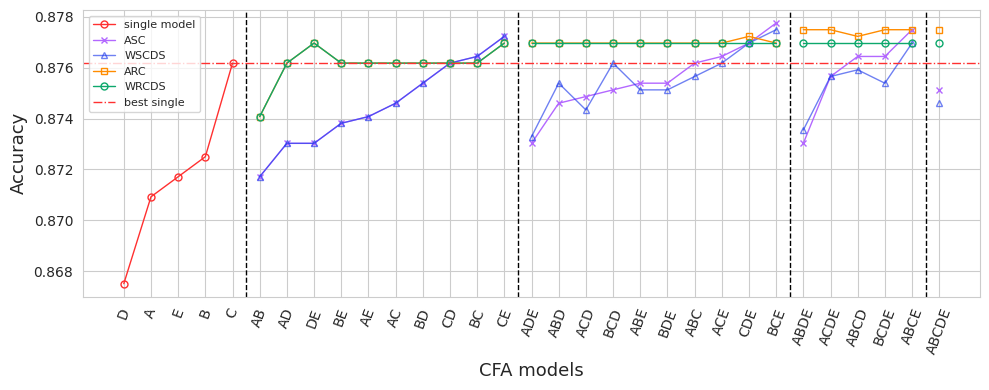

Best combination: 0.8778
Best single: 0.8762


In [21]:
fusion_df_sorted = performance_plot(fusion_df) 

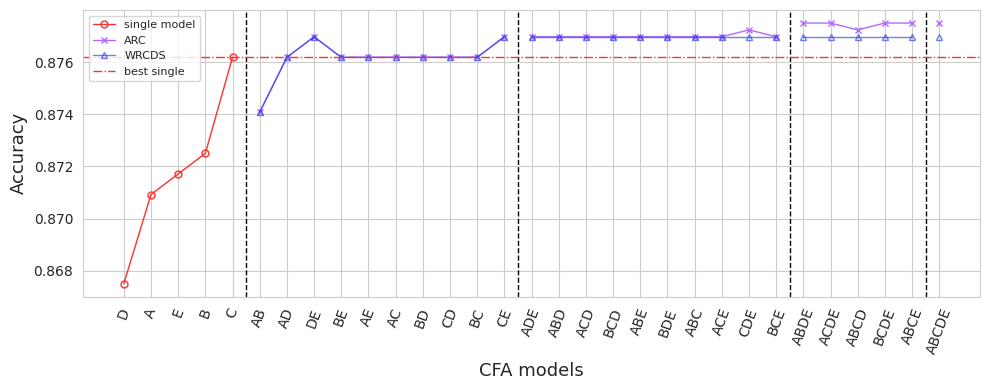

Best combination: 0.8775
Best single: 0.8762


In [11]:
fusion_df_sorted = performance_plot(fusion_df, draw_cols=("arc", "wrcds")) 